In [28]:
import math
import matplotlib.pyplot as plt
import mpmath as mpmath
from random import randrange
import IPython.display as ipd

In [8]:
def bake():
    bake = []
    for current in range(1,2**10):
        bake.append([])
        for last in range(1,2**10):
            bake[current-1].append(solve(current/2**10,last/2**10))
    print(bake[0:2])

In [75]:
class CrashSampler():
    
    
    audio_clock_rate = 48000.0
    clock_freq = 12000.0
    input_effect_ratio = (4.994520 - 5.667248) / 15.0
    freq = 111.1111
    omega = freq*2.0*math.pi/audio_clock_rate
    dampening_per_wave = 1 / 1.3

    dampening_per_sample = dampening_per_wave**(1/(audio_clock_rate/freq))

    last = 0.0
    current = 0.0
    
    inp = 0.0
    
    
    
    def generate_wave_file(self):
        file = open("crash.csv","w")
        file.write("value\n")
        self.inp = 0.0
        
        outputs = []
        for time in range(int(audio_clock_rate*2)):
            should_update_input = time < self.audio_clock_rate and time % 4 == 0
            
            input_change = 0
            if should_update_input:
                input_change = self.get_input_change(time)
            
            self._next_sample(input_change)

            if(self.current < -5):
                outputs.append(-5)
            else:
                outputs.append(self.current)
            file.write(str(self.current)+"\n")
        self.plot_wave(outputs)
        return outputs
        
    def plot_wave(self, outputs):
        plt.figure(figsize=(15, 10))
        plt.plot(outputs)
        plt.show()

    def get_input_change(self, time):
        new_inp = int(16.0 * (self.clock_freq - time/4.0) / self.clock_freq * float(randrange(2)))
        change = float(self.inp-new_inp) * self.input_effect_ratio
        self.inp = new_inp
        return change
        
    def get_next_sample(self, input_change):
        raise NotImplementedError()
        
    
    
class AmplitudePhaseSolvingCrashSampler(CrashSampler):
    phase = 0.0
    amplitude = 0.0    
    
    def _next_sample(self, change):        
        if change != 0:
            self.current = math.sin(self.phase+self.omega) * self.amplitude + change
            self.solve()
                
        self.amplitude = self.amplitude * self.dampening_per_sample
        self.phase += self.omega
        self.current = math.sin(self.phase) * self.amplitude
        self.last = self.current
    
    def solve(self):
        delta = self.current-self.last
        self.phase = math.atan((self.last+self.current)/delta * math.tan(self.omega/2)) - self.omega/2 + math.pi
        self.amplitude = -((self.last-self.current)*mpmath.sec((self.omega/2)+self.phase))/self.omega

class LineContinuingCrashSampler(CrashSampler):
    def _next_sample(self, change):        
        is_changed = False

        if change != 0:
            is_changed = True
            would_be = (2.0*math.cos(self.omega)*self.current-self.last)
            self.last = self.current * self.dampening_per_sample
            self.current = change + would_be * self.dampening_per_sample
                
        if not is_changed:
            temp = self.current
            self.current = (2*math.cos(self.omega)*self.current-self.last) * self.dampening_per_sample
            self.last = temp * self.dampening_per_sample
            


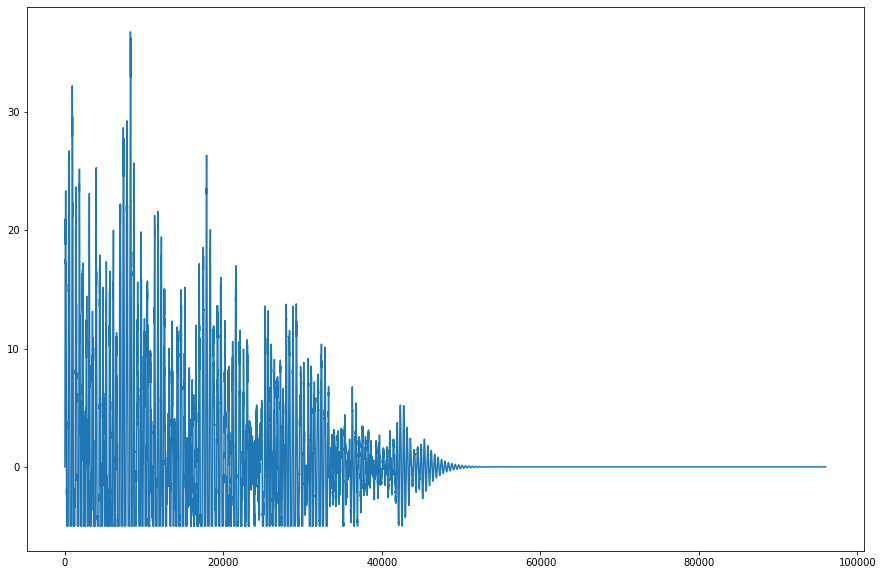

In [85]:
line_continueing_sampler = LineContinuingCrashSampler()
ipd.Audio(line_continueing_sampler.generate_wave_file(), rate=line_continueing_sampler.audio_clock_rate)

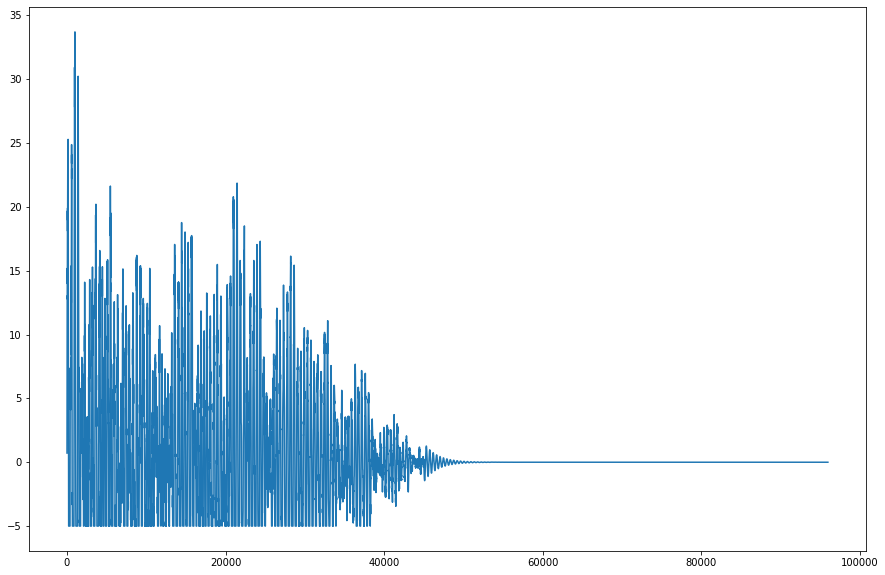

In [86]:
amplitude_phase_continueing_sampler = AmplitudePhaseSolvingCrashSampler()
ipd.Audio(amplitude_phase_continueing_sampler.generate_wave_file(), rate=amplitude_phase_continueing_sampler.audio_clock_rate)